<a href="https://colab.research.google.com/github/yugratna19/Image-Classification-MNIST-Dataset/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraires
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [ ]:
#Load Dataset
from keras.datasets import mnist
mnist_data = mnist.load_data()
mnist_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#Split data into Test and Train
(X_train, y_train) , (X_test,  y_test) = mnist_data

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,  y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
#Convert values to range of 0  to 1
X_train = X_train/255.0
X_test = X_test/ 255.0

In [ ]:
print(np.unique(X_train))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

In [ ]:
#Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])




model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2575 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [ ]:
#Model Evaluation
test_metrics  = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9766


In [ ]:
print(f"Test loss: {test_metrics[0]}")
print(f"Test accuracy: {test_metrics[1]}")

Test loss: 0.08399377763271332
Test accuracy: 0.9765999913215637


In [ ]:
#Predictions
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


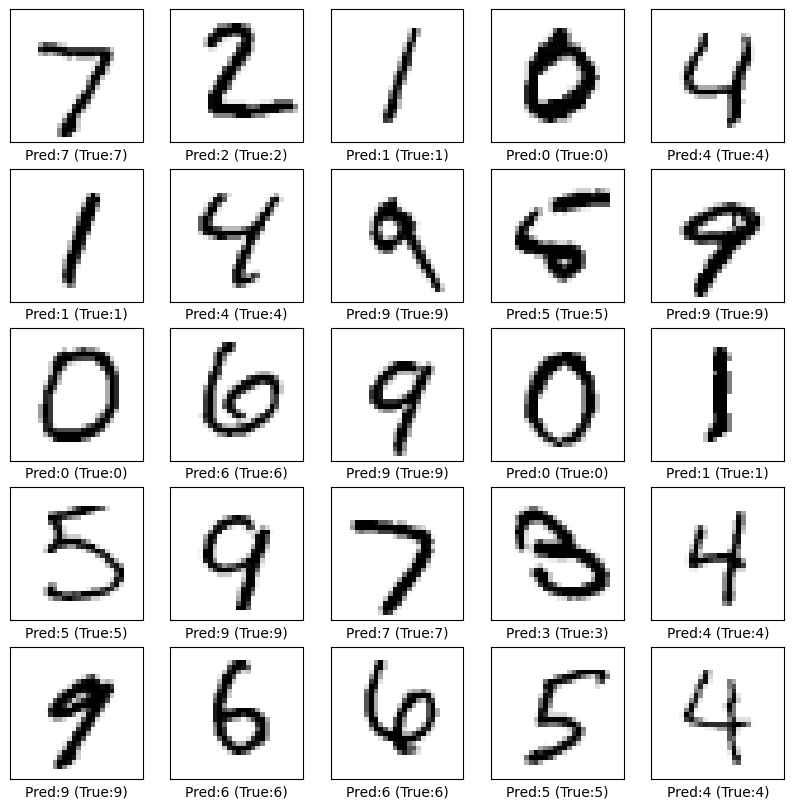

In [ ]:
#Plotting the Predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.xlabel(f'Pred:{predicted_label} (True:{true_label})')
plt.show()

In [ ]:
#Model Saving (IF NEED)
# model.save('mnist_model.h5')